In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Целевой столбец:

**lastsoldprice** - Цена продажи недвижимости

Столбцы:

'Unnamed: 0' - DELETE

'address' - DELETE

'info' - DELETE

'z_address' - +-

'bathrooms' - +

'bedrooms' - +

'finishedsqft' - +

'latitude' - +

'longitude' - +

'neighborhood' - +

'totalrooms' - +

'usecode' - +

'yearbuilt' - +

'zestimate' - +?

'zindexvalue' - +?

'zipcode' - -

'zpid' - -

In [2]:
data = pd.read_csv('data/final_data.csv')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


Идеи:
- можно others rooms сделать;
- на западе океан;
- удалённость от целевого объекта (места с повышенной бизнес-активностью);
- и адрес наверно придется как-то предобрабатывать, иначе как мы в регрессию его включим. а с координатами проще ????;
- создать столбец с Евклидовой нормой координат;
- yearbuilt использовать может вместе с usecode;
- yearbuilt использовать для расчёта возраста;
- yearbuilt. Тогда прийдётся ранжировать ценность недвижимости по возрасту?;


In [5]:
data.drop(['Unnamed: 0', 'address', 'info', 'zipcode', 'zpid'], axis=1, inplace=True)

In [6]:
data.shape

(11330, 14)

In [7]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700"
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700"
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600"
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600"
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 14 columns):
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(9), object(5)
memory usage: 1.2+ MB


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bathrooms,11330.0,1.980229e+00,1.047358e+00,0.500000,1.000000,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000,2.000000,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000,1019.000000,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,535.000000,729250.000000,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,37.708170,37.739286,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-122.510726,-122.455157,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,6.111562e+00,1.212582e+01,1.000000,4.000000,5.000000e+00,7.000000e+00,1.264000e+03
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1860.000000,1916.000000,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,432385.000000,905237.500000,1.230758e+06,1.731170e+06,1.553325e+07


### Аномалии
1. bathroom 0.5 и bathroom = 14
2. bedroom = 0 и bedrooms = 20
4. totalrooms = 1264
5. finishedsqft = 1 и finishedsqft = 27275
6. lastsoldprice = 535

### Идеи по предобработке

1. Округлить bathrooms до нижней целой границы. Там, где 0.5, создать признак-индикатор
2. 

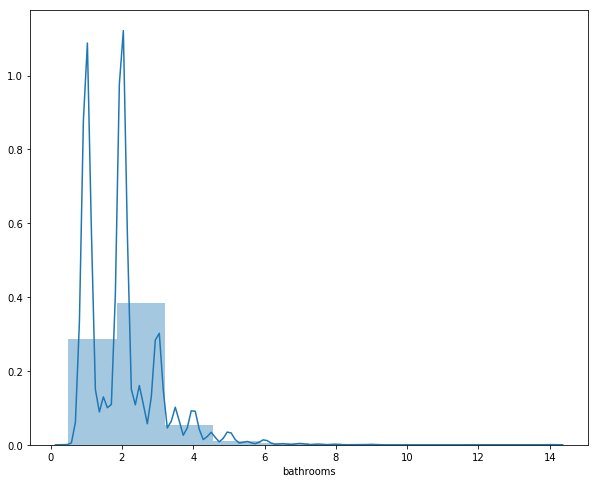

In [14]:
plt.figure(figsize=(10, 8))
sns.distplot(data['bathrooms'], bins=10)

**np.floor** - округление в меньшую сторону

**np.ceil** - округление в бОльшую сторону.

In [25]:
half_indicator = data['bathrooms'] % 1 == 0.5 # Индикатор того, есть ли только туалет или нет
data['bathrooms_smooth'] = np.floor(data['bathrooms'])
data[half_indicator].head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,bathrooms_smooth
8,4135 23rd St,3.5,4.0,2700.0,02/17/2016,3500000.0,37.752602,-122.435011,Noe Valley,9.0,SingleFamily,1912.0,3604950.0,"1,782,000",3.0
17,66 Rondel Pl,4.5,4.0,2615.0,02/12/2016,2300000.0,37.763849,-122.421259,Mission,9.0,SingleFamily,1906.0,1613306.0,"1,185,400",4.0
24,248 17th Ave,1.5,2.0,1429.0,02/12/2016,1410500.0,37.783401,-122.476049,Central Richmond,6.0,Condominium,1922.0,1170744.0,"1,485,300",1.0
29,120 Ulloa St,2.5,2.0,2063.0,02/12/2016,1700000.0,37.744348,-122.455305,Forest Hill Extension,10.0,SingleFamily,1937.0,1755644.0,"1,669,300",2.0
49,5696 Diamond Heights Blvd,3.5,3.0,2435.0,02/09/2016,2050000.0,37.738831,-122.439262,Diamond Heights,7.0,SingleFamily,1980.0,2016900.0,"1,098,500",3.0


In [29]:
data.columns

Index(['z_address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zestimate', 'zindexvalue', 'bathrooms_smooth'],
      dtype='object')

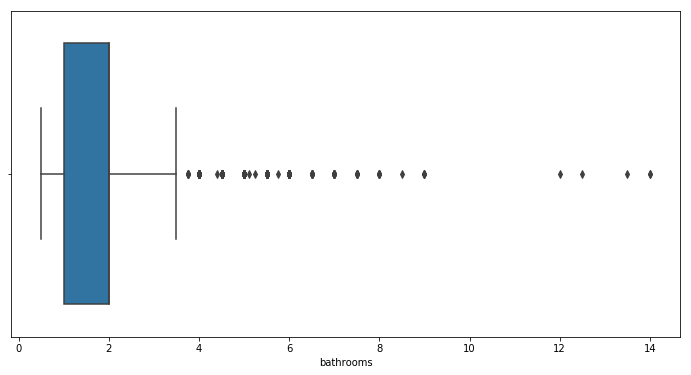

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['bathrooms'])

In [39]:
data.shape

(11330, 15)

In [63]:
# data['neighborhood'].value_counts()['Lower Pacific Heights']

In [62]:
# data[data['bathrooms'] > 6]['neighborhood'].value_counts()

['Pacific Heights', 'Presidio Heights']

In [61]:
data = data[data['bathrooms'] < 7]
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,bathrooms_smooth
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",2.0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",1.0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",4.0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",3.0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",3.0


In [67]:
data['usecode'].value_counts()

SingleFamily        5779
Condominium         4802
MultiFamily2To4      479
Duplex               142
Townhouse             66
Miscellaneous         16
Apartment              3
Cooperative            3
Mobile                 2
MultiFamily5Plus       2
Name: usecode, dtype: int64

In [72]:
data['usecode'] = data['usecode'].replace('Apartment', 'Miscellaneous').replace('Cooperative', 'Miscellaneous').replace('Mobile', 'Miscellaneous').replace('MultiFamily5Plus', 'Miscellaneous')

In [73]:
data['usecode'].value_counts()

SingleFamily       5779
Condominium        4802
MultiFamily2To4     479
Duplex              142
Townhouse            66
Miscellaneous        26
Name: usecode, dtype: int64

,count,mean,std,min,25%,50%,75%,max
bathrooms,11330.0,1.980229e+00,1.047358e+00,0.500000,1.000000,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000,2.000000,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000,1019.000000,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,535.000000,729250.000000,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,37.708170,37.739286,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-122.510726,-122.455157,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,6.111562e+00,1.212582e+01,1.000000,4.000000,5.000000e+00,7.000000e+00,1.264000e+03
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1860.000000,1916.000000,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,432385.000000,905237.500000,1.230758e+06,1.731170e+06,1.553325e+07
zipcode,11330.0,9.411691e+04,9.400877e+00,94102.000000,94110.000000,9.411500e+04,9.412300e+04,9.415800e+04


'totalrooms'
'finishedsqft'
'bathrooms'
'bedrooms'

'lot_size'
'lastsoldprice'

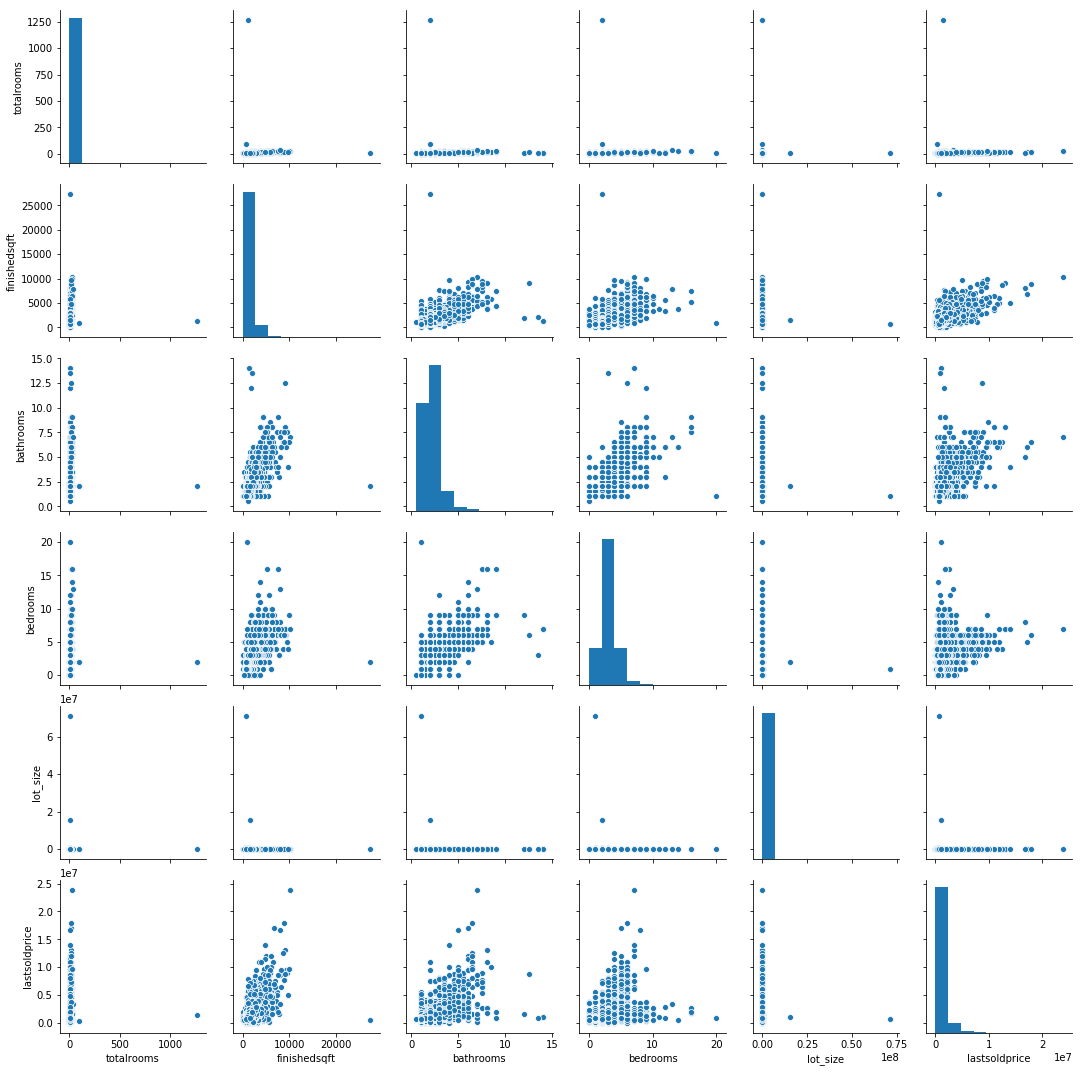

In [12]:
test_columns = ['totalrooms', 'finishedsqft', 'bathrooms', 'bedrooms', 'lot_size', 'lastsoldprice']
sns.pairplot(data[test_columns])

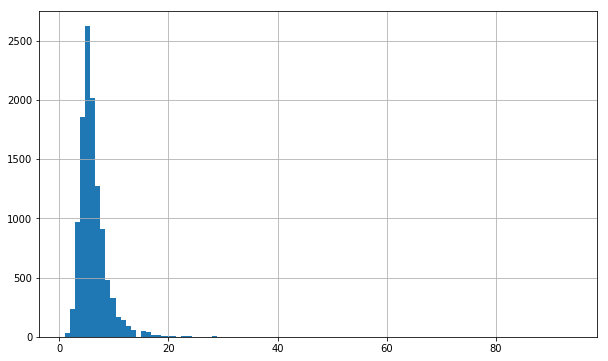

In [13]:
data.loc[data['totalrooms'] < 100, 'totalrooms'].hist(bins=100, figsize=(10, 6))

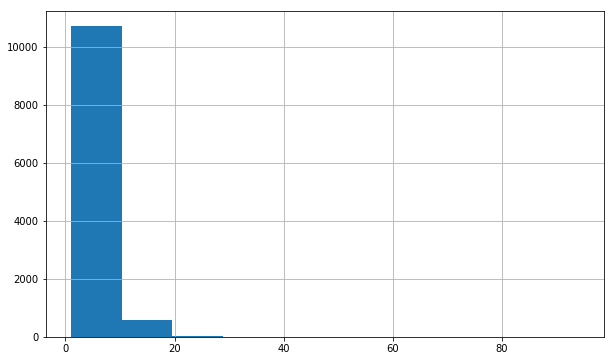

In [14]:
data.loc[data['totalrooms'] < 100, 'totalrooms'].hist(figsize=(10, 6))

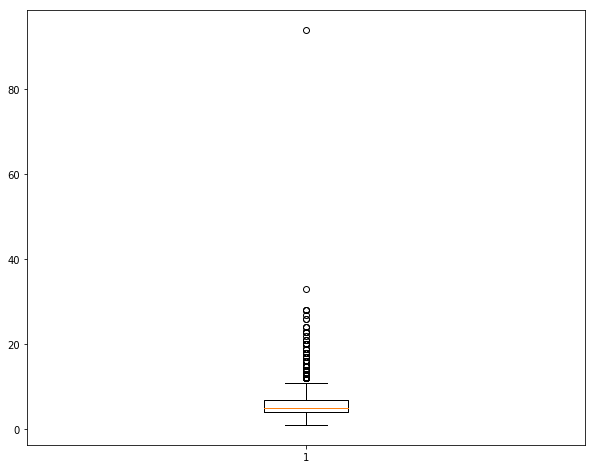

In [15]:
fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
ax.boxplot(data.loc[data['totalrooms'] < 100, 'totalrooms'])
plt.show()

In [16]:
data = data[data['totalrooms'] < 50]

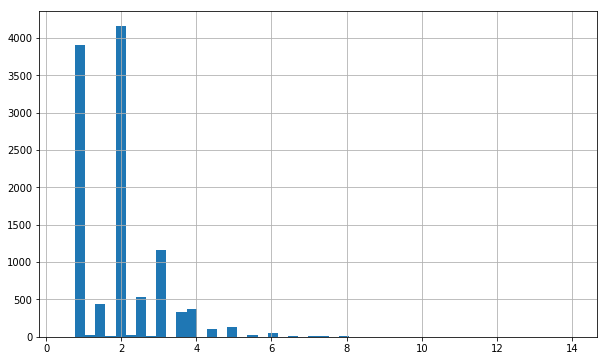

In [17]:
data.loc[:, 'bathrooms'].hist(bins=50, figsize=(10, 6))

In [18]:
data['bathrooms'] = np.ceil(data['bathrooms'])

In [19]:
data = data[data['bathrooms'] != 14]

In [20]:
# data[data['bathrooms'] > data['bedrooms']]

In [21]:
data[data['bedrooms'] > data['totalrooms']].shape

(21, 16)

In [22]:
data = data[data['bedrooms'] <= data['totalrooms']]
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750


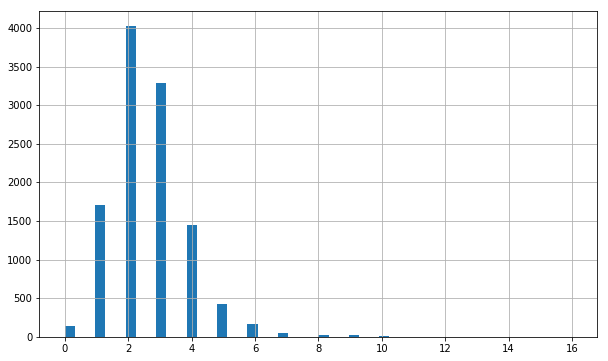

In [23]:
data.loc[:, 'bedrooms'].hist(bins=50, figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11af69be0>,
      dtype=object)

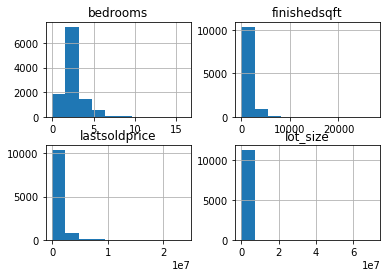

In [24]:
data[['finishedsqft', 'bedrooms', 'lot_size', 'lastsoldprice']].hist()

In [25]:
# удалить бессмысленный столбец
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['address'], axis=1)
data = data.drop(['info'], axis=1)
data = data.drop(['lastsolddate'], axis=1)
data = data.drop(['z_address'], axis=1)
data.head(5)

KeyError: "['Unnamed: 0'] not found in axis"

In [26]:
data.shape

(11304, 16)

In [27]:
data

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,149 Laidley St,2.0,3.0,2100.0,02/03/2016,1950000.0,37.739623,-122.428899,Glen Park,10.0,SingleFamily,1900.0,1895813.0,"1,628,900",94131.0,2500
11326,737 Tehama St # 1,2.0,2.0,977.0,02/02/2016,1030000.0,37.775184,-122.411567,South of Market,5.0,MultiFamily2To4,2006.0,999443.0,"957,300",94103.0,1554
11327,319 De Long St,1.0,2.0,875.0,02/02/2016,565000.0,37.709411,-122.465031,Outer Mission,4.0,SingleFamily,1950.0,639167.0,"804,400",94112.0,2256
11328,1655 48th Ave,1.0,2.0,697.0,02/02/2016,762000.0,37.755586,-122.508063,Outer Sunset,4.0,SingleFamily,1904.0,703197.0,"1,030,300",94122.0,2996


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11304 entries, 0 to 11329
Data columns (total 16 columns):
z_address        11304 non-null object
bathrooms        11304 non-null float64
bedrooms         11304 non-null float64
finishedsqft     11304 non-null float64
lastsolddate     11304 non-null object
lastsoldprice    11304 non-null float64
latitude         11304 non-null float64
longitude        11304 non-null float64
neighborhood     11304 non-null object
totalrooms       11304 non-null float64
usecode          11304 non-null object
yearbuilt        11304 non-null float64
zestimate        11304 non-null float64
zindexvalue      11304 non-null object
zipcode          11304 non-null float64
lot_size         11304 non-null int64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.5+ MB


In [29]:
data.describe(include='all')

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
count,11304,11304.000000,11304.000000,11304.000000,11304,1.130400e+04,11304.000000,11304.000000,11304,11304.000000,11304,11304.000000,1.130400e+04,11304,11304.000000,1.130400e+04
unique,10661,NaN,NaN,NaN,954,NaN,NaN,NaN,71,NaN,10,NaN,NaN,139,NaN,NaN
top,1300 Eddy St,NaN,NaN,NaN,11/08/2013,NaN,NaN,NaN,Mission,NaN,SingleFamily,NaN,NaN,"1,167,700",NaN,NaN
freq,5,NaN,NaN,NaN,46,NaN,NaN,NaN,539,NaN,5786,NaN,NaN,468,NaN,NaN
mean,NaN,2.042728,2.606069,1584.425602,NaN,1.264325e+06,37.759748,-122.436526,NaN,5.995223,NaN,1948.505662,1.565641e+06,NaN,94116.913305,2.092620e+04
std,NaN,1.084926,1.275568,920.658560,NaN,1.042359e+06,0.025552,0.030756,NaN,2.583606,NaN,37.900802,1.229111e+06,NaN,9.402098,6.844878e+05
min,NaN,1.000000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,NaN,1.000000,NaN,1860.000000,4.323850e+05,NaN,94102.000000,0.000000e+00
25%,NaN,1.000000,2.000000,1019.000000,NaN,7.300000e+05,37.739365,-122.455204,NaN,4.000000,NaN,1916.000000,9.053955e+05,NaN,94110.000000,2.378750e+03
50%,NaN,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760521,-122.432510,NaN,5.000000,NaN,1940.000000,1.231511e+06,NaN,94115.000000,2.996000e+03
75%,NaN,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413356,NaN,7.000000,NaN,1986.000000,1.730049e+06,NaN,94123.000000,5.236000e+03


In [30]:
data.isnull().sum()

z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
lot_size         0
dtype: int64

In [31]:
data['zindexvalue'] = data['zindexvalue'].str.replace(',', '').astype(int)

In [32]:
data['zindexvalue'].describe()

count    1.130400e+04
mean     1.320883e+06
std      5.850371e+05
min      6.881000e+05
25%      9.829000e+05
50%      1.214000e+06
75%      1.480400e+06
max      5.333500e+06
Name: zindexvalue, dtype: float64

In [33]:
data.columns

Index(['z_address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zestimate', 'zindexvalue', 'zipcode',
       'lot_size'],
      dtype='object')

In [60]:
t_data = data[['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms', 'totalrooms', 'lastsoldprice']]

In [61]:
t_data.head(5)

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice
0,1043.0,1167508.0,2.0,2.0,4.0,1300000.0
1,903.0,823719.0,1.0,1.0,3.0,750000.0
2,1425.0,1708594.0,4.0,3.0,6.0,1495000.0
3,2231.0,2411236.0,3.0,3.0,10.0,2700000.0
4,1300.0,1918539.0,3.0,3.0,4.0,1530000.0


In [62]:
t_data = t_data.query('finishedsqft < 25000')

In [63]:
t_data.describe()['finishedsqft']

count    11303.000000
mean      1582.152703
std        888.417004
min          1.000000
25%       1019.000000
50%       1362.000000
75%       1875.500000
max      10236.000000
Name: finishedsqft, dtype: float64

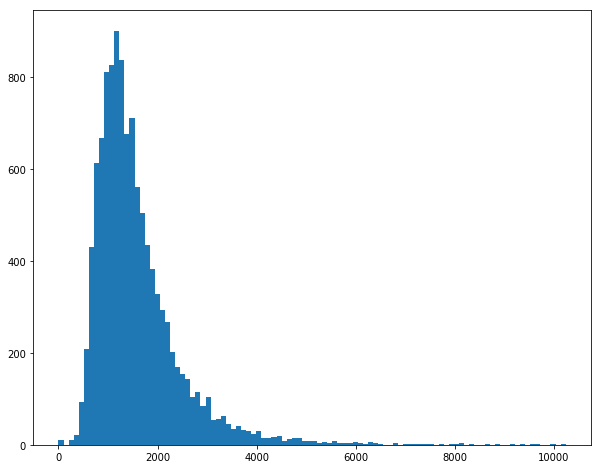

In [64]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.hist(t_data['finishedsqft'], bins = 100)
plt.show()

In [65]:
t_data = t_data[t_data['finishedsqft'] < 6000]

In [ ]:
sns.pairplot(t_data)

In [ ]:
sns.pairplot(t_data[['bathrooms', 'bedrooms', 'totalrooms', 'finishedsqft']])

1. Кол-во комнат / кол-во ванных как коэффициент
2. общую квадратуру / Кол-во комнат

In [40]:
import math

In [ ]:
# math.ceil - округление числа в бОльшую сторону
# math.floor - округление числа в меньшую сторону

In [66]:
total_bath = t_data['totalrooms'] / t_data['bathrooms']
total_bed = t_data['totalrooms'] / t_data['bedrooms']
avg_sqrt =  t_data['finishedsqft'] / t_data['totalrooms']

In [67]:
t_data['bathrooms'] = t_data['bathrooms'].apply(math.ceil).astype(int)
t_data['bedrooms'] = t_data['bedrooms'].apply(math.ceil).astype(int)

In [68]:
t_data.describe()

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice
count,11252.000000,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04
mean,1556.185034,1.531825e+06,2.024440,2.588784,5.949076,1.238067e+06
std,797.960627,1.098961e+06,1.046271,1.240672,2.466302,9.160527e+05
min,1.000000,4.323850e+05,1.000000,0.000000,1.000000,5.350000e+02
25%,1018.000000,9.045722e+05,1.000000,2.000000,4.000000,7.288750e+05
50%,1360.000000,1.227016e+06,2.000000,2.000000,5.000000,9.877500e+05
75%,1865.250000,1.720590e+06,2.000000,3.000000,7.000000,1.440000e+06
max,5972.000000,1.275245e+07,12.000000,16.000000,26.000000,1.400000e+07


In [69]:
# Отсеять!
t_data = t_data.query('bathrooms < 14')

In [45]:
t_data.head(5)

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice
0,1043.0,1167508.0,2,2,4.0,1300000.0
1,903.0,823719.0,1,1,3.0,750000.0
2,1425.0,1708594.0,4,3,6.0,1495000.0
3,2231.0,2411236.0,3,3,10.0,2700000.0
4,1300.0,1918539.0,3,3,4.0,1530000.0


In [ ]:
# t_data.loc[6743]

In [73]:
t_data = t_data.drop([6743])

In [74]:
# Отсеять!
t_data.query('bedrooms == 20')

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice


In [ ]:
# Интересный кейс
# t_data.query('bathrooms > bedrooms')

In [ ]:
t_data['bathrooms'].hist()

In [ ]:
t_data['bedrooms'].hist()

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
t_data.shape

In [51]:
data.query('bedrooms > totalrooms').shape[0] / t_data.shape[0]

0.0

In [ ]:
t_data = data.copy()

In [ ]:
t_data.head(5)

In [ ]:
t_data.shape

In [75]:
t_data = t_data[(t_data['bedrooms'] + t_data['bathrooms']) <= t_data['totalrooms']]

In [77]:
t_data

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice
0,1043.0,1167508.0,2,2,4.0,1300000.0
1,903.0,823719.0,1,1,3.0,750000.0
3,2231.0,2411236.0,3,3,10.0,2700000.0
5,1250.0,703392.0,1,2,5.0,460000.0
6,1032.0,741715.0,1,3,6.0,532000.0
...,...,...,...,...,...,...
11325,2100.0,1895813.0,2,3,10.0,1950000.0
11326,977.0,999443.0,2,2,5.0,1030000.0
11327,875.0,639167.0,1,2,4.0,565000.0
11328,697.0,703197.0,1,2,4.0,762000.0


In [76]:
t_data.shape

(10498, 6)

In [78]:
# Отсеять
t_data = t_data.query('(bedrooms <= totalrooms) or (bathrooms <= totalrooms)')

In [ ]:
t_data.head(5)

In [ ]:
data.shape

In [55]:
t_data.shape

(10498, 6)

In [ ]:
t_data.head(5)

In [ ]:
t_data.describe()

In [ ]:
new_t_data = t_data[['zestimate', 'lastsoldprice']]
new_t_data.head(5)

In [ ]:
t_data.columns

In [79]:
new_t_data = t_data[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'lot_size', 'lastsoldprice']]

In [ ]:
new_t_data.head(5)

In [81]:
# new_t_data['total_bath'] = total_bath
# new_t_data['total_bed'] = total_bed
# new_t_data['avg_sqrt'] = avg_sqrt
# new_t_data.head(5)

In [82]:
t_data['total_bath'] = total_bath
t_data['total_bed'] = total_bed
t_data['avg_sqrt'] = avg_sqrt
t_data.head(5)

,finishedsqft,zestimate,bathrooms,bedrooms,totalrooms,lastsoldprice,total_bath,total_bed,avg_sqrt
0,1043.0,1167508.0,2,2,4.0,1300000.0,2.000000,2.000000,260.75
1,903.0,823719.0,1,1,3.0,750000.0,3.000000,3.000000,301.00
3,2231.0,2411236.0,3,3,10.0,2700000.0,3.333333,3.333333,223.10
5,1250.0,703392.0,1,2,5.0,460000.0,5.000000,2.500000,250.00
6,1032.0,741715.0,1,3,6.0,532000.0,6.000000,2.000000,172.00


In [84]:
X_columns = [c for c in t_data.columns if c != 'lastsoldprice']
y_column = 'lastsoldprice'

X_columns, y_column

(['finishedsqft',
  'zestimate',
  'bathrooms',
  'bedrooms',
  'totalrooms',
  'total_bath',
  'total_bed',
  'avg_sqrt'],
 'lastsoldprice')

In [ ]:
# X = new_t_data[['total_bath', 'total_bed', 'avg_sqrt']]
# y = new_t_data['lastsoldprice']

In [85]:
X = t_data[X_columns]
y = t_data[y_column]

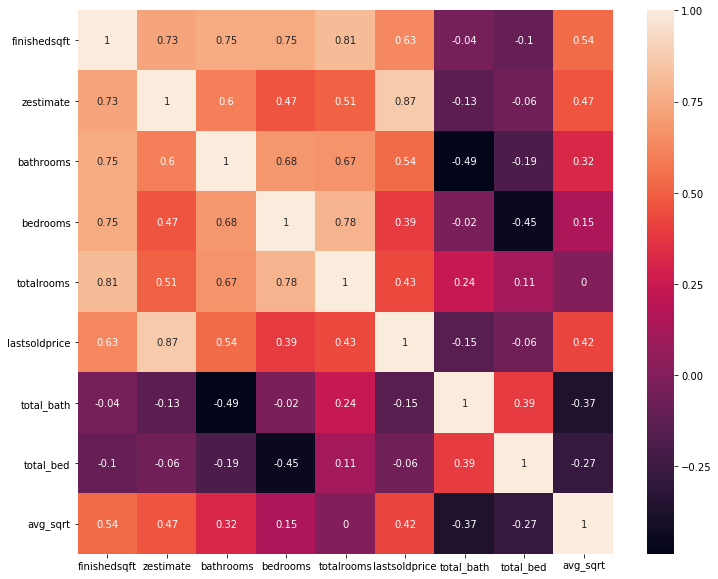

In [86]:
correlation_matrix = t_data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [90]:
cat_data = data[['neighborhood', 'usecode', 'zipcode', 'lot_size', 'lastsoldprice']]
cat_data.head(5)

,neighborhood,usecode,zipcode,lot_size,lastsoldprice
0,South of Market,Condominium,94103.0,43557,1300000.0
1,South of Market,Condominium,94107.0,213232,750000.0
2,Potrero Hill,Condominium,94107.0,2496,1495000.0
3,Potrero Hill,SingleFamily,94107.0,2469,2700000.0
4,Bernal Heights,SingleFamily,94110.0,1750,1530000.0


In [123]:
cat_data['zipcode'] = cat_data['zipcode'].astype('int').astype('str')

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
neighborhood_data = cat_data['usecode'].value_counts()
# neighborhood_data = cat_data['zipcode'].value_counts()
# neighborhood_data = cat_data['lot_size'].value_counts()

In [163]:
neighborhood_data.shape

(6,)

In [153]:
# pd.cut(cat_data['lot_size'], bins=100, labels=range(100)).astype(int).value_counts()

'SingleFamily'
'Condominium'
'MultiFamily2To4'
'Duplex'
'Townhouse'
'Miscellaneous'

6 - размерность матрицы, которая равна числу уникальных классов

'SingleFamily' | 'Condominium' | 'MultiFamily2To4' | 'Duplex' | 'Townhouse' | 'Miscellaneous'

1                   0               0                    0           0               0

0                   1               0                    0           0               0

...

0                   0               0                    0           0               1

In [164]:
for val, index in zip(neighborhood_data, neighborhood_data.index):
    print(index, ' ', val)

SingleFamily   5786
Condominium   4796
MultiFamily2To4   483
Duplex   146
Townhouse   66
Miscellaneous   26


In [113]:
rare_usecode = neighborhood_data[neighborhood_data < 50].index
rare_usecode

Index(['Miscellaneous', 'Cooperative', 'Apartment', 'MultiFamily5Plus',
       'Mobile'],
      dtype='object')

In [116]:
cat_data.loc[cat_data['usecode'].isin(rare_usecode), 'usecode'] = 'Miscellaneous'

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
cat_data.loc[cat_data['zipcode'] == '94104']

In [130]:
cat_data.drop([3754], inplace=True)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [140]:
new_cat_data = cat_data[['zipcode', 'usecode', 'lastsoldprice']].copy()
new_cat_data.head(5)

,zipcode,usecode,lastsoldprice
0,94103,Condominium,1300000.0
1,94107,Condominium,750000.0
2,94107,Condominium,1495000.0
3,94107,SingleFamily,2700000.0
4,94110,SingleFamily,1530000.0


In [155]:
from sklearn.preprocessing import OneHotEncoder

ohencoder = OneHotEncoder()

In [159]:
pretrain_cats = ohencoder.fit_transform(new_cat_data[['zipcode', 'usecode']]).toarray()

In [167]:
pretrain_cats.shape

(11303, 30)

In [196]:
pretrain_cats_df = pd.DataFrame(pretrain_cats)
pretrain_cats_df['lastsoldprice'] = new_cat_data['lastsoldprice']
pretrain_cats_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,lastsoldprice
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1300000.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,750000.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1495000.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2700000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1530000.0


,neighborhood,usecode,zipcode,lot_size,lastsoldprice


In [118]:
['usecode']

['usecode']

In [117]:
cat_data['usecode'].value_counts()

SingleFamily       5786
Condominium        4797
MultiFamily2To4     483
Duplex              146
Townhouse            66
Miscellaneous        26
Name: usecode, dtype: int64

Классическое разделение обучаемой и тестовой выборки - 70/30

In [ ]:
X_columns

In [ ]:
X_new = X[['finishedsqft', 'bathrooms', 'bedrooms']]
X_new.head(5)

In [ ]:
X_new = X

In [ ]:
X = t_data[X_columns]
y = t_data[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_new)
X_new_norm = scaler.transform(X_new)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X_new_norm, y, test_size=0.2, random_state=30)

In [ ]:
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

# scaler = preprocessing.StandardScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

**MinMax** - (Значение - Минимальным значением выборки) / (Максимальное значение выборки - Минимальное значение выборки)

**Standart** - (Значение - среднее значение выборки) / среднее квадратическое отклонение 

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

In [ ]:
X.describe().iloc[:4]

In [ ]:
np.mean(X_new, axis=0)

In [ ]:
np.std(X_new, axis=0)

In [ ]:
X_new

In [ ]:
X_new

In [180]:
pretrain_cats_df.shape

(11303, 31)

In [181]:
pretrain_cats_df.dropna(inplace=True)
pretrain_cats_df.shape

(11276, 31)

In [190]:
data.drop([3754], inplace=True)

In [194]:
data[data['lastsoldprice'].isna()].shape

(0, 16)

In [205]:
final_df = pd.merge(data[['finishedsqft', 'bathrooms', 'bedrooms']], pretrain_cats_df, how='right', left_index=True, right_index=True)
final_df.head(5)

,finishedsqft,bathrooms,bedrooms,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,lastsoldprice
0,1043.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1300000.0
1,903.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,750000.0
2,1425.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1495000.0
3,2231.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2700000.0
4,1300.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1530000.0


In [208]:
final_df.dropna(inplace=True)

In [211]:
X_columns = [c for c in final_df.columns if c != 'lastsoldprice']
y_column = 'lastsoldprice'

# X_columns, y_column

In [212]:
X = final_df[X_columns]
y = final_df[y_column]

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)

In [ ]:
X.iloc[0]

In [ ]:
X.shape

In [185]:
X_train.shape, X_test.shape

((9020, 30), (2256, 30))

In [ ]:
X_train.loc[X_train['total_bed'] == np.inf, 'total_bed'] = 0.0
X_test.loc[X_test['total_bed'] == np.inf, 'total_bed'] = 0.0

In [ ]:
X_train.max()

In [ ]:
X_test.max()

In [176]:
X_train.fillna(0.0, inplace=True)
X_test.fillna(0.0, inplace=True)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [ ]:
X_train # random_state = 30

In [ ]:
X_train.head(5)

In [ ]:
print(np.min(X_train, axis=0))
print(np.max(X_train, axis=0))

In [ ]:
X_test.head(5)

In [179]:
y_train.isna().sum()

21

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.45446979008978805
RMSE: 	 815077.52
MAE: 	 444890.62


'zestimate'

R2: 	 0.7128014370154087

RMSE: 	 454466.59

MAE: 	 263738.76


'total, bed, bath'

R2: 	 0.4542447320285893
RMSE: 	 626483.74
MAE: 	 382819.36

'total, bed, bath MinMax'

R2: 	 0.4542447320285893
RMSE: 	 626483.74
MAE: 	 382819.36


In [ ]:
estimator.coef_

In [ ]:
X_new.columns

In [ ]:
estimator.intercept_

In [ ]:
X_new

In [ ]:
for a, b in zip(y, y_pred):
    print('True: {}, Pred: {}. Difference: {}'.format(a, b, a-b))

In [ ]:
y_pred.mean()

In [ ]:
X_test.iloc[0]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pickle

In [ ]:
with open('model_file', 'rb') as m_file:
    estimator = pickle.load(m_file)

In [ ]:
estimator.predict([[2400, 3.0, 1.0]])

In [ ]:
with open('model_file', 'wb') as m_file:
    pickle.dump(estimator, m_file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
X.columns

In [ ]:
estimator.coef_

In [ ]:
estimator.predict(scaler.transform([[1034, 1167508, 2, 4]]))

In [ ]:
X_columns

In [ ]:
estimator.coef_

In [ ]:
estimator.intercept_

In [ ]:
t_data.head(5)

In [ ]:
t_data.index

In [ ]:
t_data.head(5)

In [ ]:
t_data['neighborhood'] = data.loc[t_data.index, 'neighborhood']
t_data.head(5)

In [ ]:
t_data['neighborhood'].unique()

**Zest** - 'это независимая оценка, туда очевидно входят и площадь и положение и количество комнат и район, надо оставить его и найти какой то фактор который эта оценка не учитывает

In [ ]:
from sklearn import preprocessing

In [ ]:
# t_data['neighborhood'].value_counts()

In [ ]:
t_data.shape

In [ ]:
neighborhood = t_data['neighborhood'].get_values().reshape(-1, 1)

In [ ]:
# One-hot encoding
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(neighborhood)
oh_result = oh_encoder.transform(neighborhood).toarray()
oh_result

In [ ]:
neighborhood_columns = ['neighborhood_{}'.format(i) for i in range(oh_result.shape[1])]

In [ ]:
neighborhood_df = pd.DataFrame(oh_result, columns=neighborhood_columns)
neighborhood_df.index = t_data.index

In [ ]:
t_data_neib = pd.concat([t_data, neighborhood_df], axis=1)
t_data_neib = t_data_neib.drop(['neighborhood'], axis=1)
t_data_neib.head(5)

In [ ]:
t_data_neib.columns

In [ ]:
X = t_data_neib.drop(['lastsoldprice', 'totalrooms'], axis=1)
y = t_data_neib[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.8199314378189773

RMSE: 	 448840.6796404482

MAE: 	 265237.51964739535

In [ ]:
X.columns[:4]

In [ ]:
estimator.coef_[:4]

In [ ]:
# estimator.coef_[-71:]

In [ ]:
estimator.intercept_

In [ ]:
for n, vect in zip(neighborhood[:10], label_result[:10]):
    print(n, '!!!!', vect)

In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(neighborhood)
label_result = label_encoder.transform(neighborhood)
print('LABEL')

In [ ]:
# PolynomialFeatures
poly_encoder = preprocessing.PolynomialFeatures(degree=2)
poly_encoder.fit(X)
X_poly = poly_encoder.transform(X)

In [ ]:
X_poly

In [ ]:
X_poly.shape

In [ ]:
t_data.describe()

In [ ]:
t_data.columns

In [ ]:
t_data.head(5)

In [ ]:
from sklearn import preprocessing

In [ ]:
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

In [ ]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

In [ ]:
sns.pairplot(data)

In [ ]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
sns.countplot(x='usecode', data=data)
plt.xticks(rotation=90)

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression

grid_params = {'fit_intercept': [True, False]}
estimator = LinearRegression()
regression_model = GridSearchCV(estimator, grid_params, cv=5, n_jobs=-1, verbose=1)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

In [ ]:
t_data['lastsoldprice'].hist(bins=100)

In [ ]:
t_data['lastsoldprice'].mean(), t_data['lastsoldprice'].median()

In [ ]:
t_data[t_data['neighborhood'] == 'South of Market']['lastsoldprice'].mean()

In [ ]:
lastsoldprice = t_data['lastsoldprice'].copy()

In [ ]:
lastsoldprice.loc[[0, 5, 10]] = 10

In [ ]:
lastsoldprice.loc[:30] = None

In [ ]:
lastsoldprice.loc[:30] = lastsoldprice.mean()

In [ ]:
np.mean(old_vals - lastsoldprice.loc[:30])

In [ ]:
old_vals = t_data['lastsoldprice'].loc[:30]

In [ ]:
lastsoldprice

In [ ]:
!pip install pandas_profiling

In [ ]:
import pandas_profiling

In [ ]:
data.shape

In [ ]:
np.inf # Бесконечность

In [ ]:
# Удаление дубликатов
data.drop_duplicates().shape

In [ ]:
data.profile_report()